In [1]:
%pylab inline

import numpy as np
from sklearn import model_selection, linear_model, datasets, metrics
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


## Make datasets

In [2]:
clf_data, clf_target = datasets.make_classification(n_features=2, n_informative=2, n_classes=2, n_redundant=0, n_clusters_per_class=1,random_state=7)

In [3]:
reg_data, reg_target = datasets.make_regression(n_features=2, n_informative=1, n_targets=1, noise=5., random_state=7)

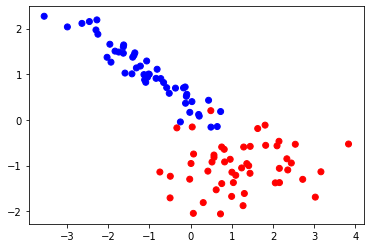

In [4]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(clf_data[:, 0], clf_data[:, 1], c=clf_target, cmap=colors)

Text(0.5, 1.0, '2nd feature to target dependency')

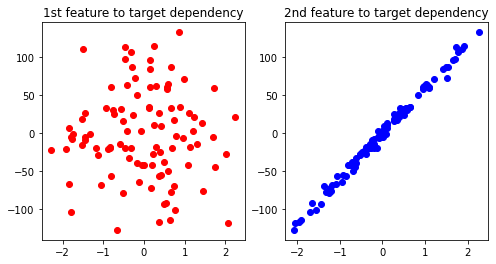

In [5]:
pylab.figure(figsize(8, 4))

pylab.subplot(1, 2, 1)
pylab.scatter(reg_data[:, 0], reg_target, color='r')
pylab.title('1st feature to target dependency')
pylab.subplot(1, 2, 2)
pylab.scatter(reg_data[:, 1], reg_target, color='b')
pylab.title('2nd feature to target dependency')


In [6]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = model_selection.train_test_split(clf_data, clf_target, test_size=0.3, random_state=1)

In [7]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = model_selection.train_test_split(reg_data, reg_target, test_size=0.3, random_state=1)

## Metrics for classification problems

Lets teach our model
    loss='log' means that we use logistic loss function (cause it's a prob classifier -> we ll use probabilities then)

In [18]:
classifier = linear_model.SGDClassifier(loss='log', random_state=1, max_iter=1000)

In [19]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(loss='log', random_state=1)

In [20]:
preds = classifier.predict(clf_test_data)

In [21]:
prob_preds = classifier.predict_proba(clf_test_data)

In [22]:
clf_test_labels

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0])

In [23]:
preds

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0])

In [24]:
prob_preds[:10]

array([[0.00000000e+00, 1.00000000e+00],
       [9.99999997e-01, 2.90779994e-09],
       [9.99990982e-01, 9.01818055e-06],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.01333183e-14],
       [5.16838702e-07, 9.99999483e-01],
       [6.66133815e-16, 1.00000000e+00],
       [1.00000000e+00, 6.21822808e-13],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999998e-01, 2.30155106e-09]])

### accuracy

In [25]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, preds)]) / len(clf_test_labels)

0.9333333333333333

In [26]:
metrics.accuracy_score(clf_test_labels, preds)

0.9333333333333333

### confusion matrix

its a matrix 

| | y = 1 |  y = -1|
| :- | -: | -: |
| a(x) = 1 | TP | FP |
| a(x) = -1 | FN | TN |

In [27]:
conf_mtrx = metrics.confusion_matrix(clf_test_labels, preds)

In [28]:
conf_mtrx

array([[17,  1],
       [ 1, 11]], dtype=int64)

In [29]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, preds)])

28

In [30]:
conf_mtrx.diagonal().sum()

28

### precision

In [33]:
metrics.precision_score(clf_test_labels, preds, pos_label=0)

0.9444444444444444

In [41]:
manual_precision = conf_mtrx[0][0] / conf_mtrx[0].sum()

In [42]:
metrics.precision_score(clf_test_labels, preds) # default 1 class not 0

0.9166666666666666

In [43]:
conf_mtrx[1][1] / conf_mtrx[1].sum()

0.9166666666666666

### recall

In [44]:
metrics.recall_score(clf_test_labels, preds, pos_label=0)

0.9444444444444444

In [45]:
manual_recall = conf_mtrx[0][0] / conf_mtrx[:][0].sum()

### f1

$$ f1 = \dfrac{2*precision*recall}{precision+recall} $$

In [46]:
f1_manual = 2 * manual_precision * manual_recall / (manual_recall + manual_precision)
f1_manual

0.9444444444444444

In [48]:
metrics.f1_score(clf_test_labels, preds, pos_label=0)

0.9444444444444444

### classsification report

In [50]:
print(metrics.classification_report(clf_test_labels, preds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [53]:
# fpr, tpr, _ = metrics.roc_curve(clf_test_labels, preds)
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, prob_preds[:, 1])

Text(0, 0.5, 'TPR')

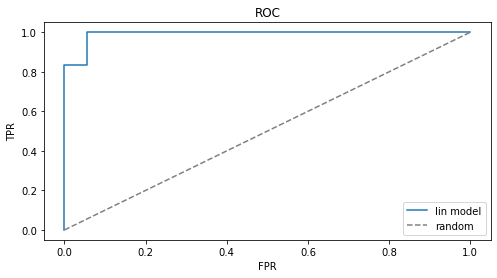

In [61]:
plot(fpr, tpr, label='lin model')
plot([0, 1], [0, 1], '--', label='random', color='grey')
legend(loc='lower right')
title('ROC')
xlabel('FPR')
ylabel('TPR')

In [62]:
metrics.roc_auc_score(clf_test_labels, preds)

0.9305555555555554

In [63]:
metrics.roc_auc_score(clf_test_labels, prob_preds[:, 1])

0.9907407407407407

### AUC-PRC

In [66]:
metrics.average_precision_score(clf_test_labels, preds)

0.873611111111111

### Logistic Loss

In [67]:
metrics.log_loss(clf_test_labels, prob_preds[:, 1])

0.21767621111290084

# Regression problem

## metrics

In [70]:
regressor = linear_model.SGDRegressor(random_state=1, max_iter=20)

In [71]:
regressor.fit(reg_train_data, reg_train_labels)

C:\Users\Svatostop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(max_iter=20, random_state=1)

In [72]:
reg_preds = regressor.predict(reg_test_data)

In [73]:
reg_test_labels

array([   2.67799047,    7.06525927,  -56.43389936,   10.08001896,
        -22.46817716,  -19.27471232,   59.44372825,  -21.60494574,
         32.54682713,  -41.89798772,  -18.16390935,   32.75688783,
         31.04095773,    2.39589626,   -5.04783924,  -70.20925097,
         86.69034305,   18.50402992,   32.31573461, -101.81138022,
         15.14628858,   29.49813932,   97.282674  ,   25.88034991,
        -41.63332253,  -92.11198201,   86.7177122 ,    2.13250832,
        -20.24967575,  -27.32511755])

In [74]:
reg_preds

array([ -1.46503565,   5.75776789, -50.13234306,   5.05646094,
       -24.09370893,  -8.34831546,  61.77254998, -21.98350565,
        30.65112022, -39.25972497, -17.19337022,  30.94178225,
        26.98820076,  -6.08321732,  -3.46551   , -78.9843398 ,
        84.80190097,  14.80638314,  22.91302375, -89.63572717,
        14.5954632 ,  31.64431951,  95.81031534,  21.5037679 ,
       -43.1101736 , -95.06972123,  86.70086546,   0.47837761,
       -16.44594704, -22.72581879])

### MAE - mean absolute value

In [75]:
metrics.mean_absolute_error(reg_test_labels, reg_preds)

3.748761311885298

### MSE - mean squared value

In [76]:
metrics.mean_squared_error(reg_test_labels, reg_preds)

24.114925597460914

### root MSE

In [77]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_preds))

4.91069502183356

### r2 score

$$ R^2(a, X) = 1 - \dfrac{\sum_{i=1}^l (a(x_i) - y_i)^2}{\sum_{i=1}^l (y_i - \overline{y})^2}$$

In [78]:
metrics.r2_score(reg_test_labels, reg_preds)

0.989317615054695